<div class = "alert alert-block alert-warning">
    <center><h2>Análise de Atividades Policiais em Rhode Island</h2>
<center><h2>Estatística Aplicada a Computação</h2>
<center>Aluno: Emerson Ian Bezerra de Sousa
    <div>

### Bibliotecas importadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dados importados

In [2]:
police = pd.read_csv('police.csv', sep = ',')

In [3]:
weather = pd.read_csv('weather.csv', sep = ',')

<div class = "alert alert-block alert-success">
<h2>TAREFA 1
<div>

##### Quantidade de variáveis e registros policiais disponíveis

In [4]:
li, co = police.shape

In [5]:
print(f"O DataFrame 'police' apresenta {co} variáveis e {li} registros policiais")

O DataFrame 'police' apresenta 15 variáveis e 91741 registros policiais


##### Número de dados faltosos de cada variável

In [6]:
dadosf = pd.DataFrame(police.isna().sum()).reset_index()
dadosf.columns = ['Variáveis', 'Qtd. NaN']
dadosf

,Variáveis,Qtd. NaN
0,state,0
1,stop_date,0
2,stop_time,0
3,county_name,91741
4,driver_gender,5205
5,driver_race,5202
6,violation_raw,5202
7,violation,5202
8,search_conducted,0
9,search_type,88434


#####  Por trabalhar somente com dados de um único estado as variáveis county_name e state foram excluídas

In [7]:
police = police.drop(columns=['state', 'county_name'], axis = 1)
police.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


##### Remoação dos dados faltosos da coluna driver_gender

In [8]:
print('Total de linhas no DataFrame')
print(len(police))
police = police.dropna(subset=['driver_gender'])
print('Total de linhas no DataFrame sem os valores faltosos em Gênero:')
print(len(police))

Total de linhas no DataFrame
91741
Total de linhas no DataFrame sem os valores faltosos em Gênero:
86536


#####  Verificação se as variáveis search_conducted, is_arrested e district são do tipo booeano e transformaão das que não são para o tipo booleano

In [9]:
police['search_conducted'].dtype

dtype('bool')

In [10]:
police['district'].dtype

dtype('O')

In [11]:
police['is_arrested'].dtype

dtype('O')

In [12]:
police['is_arrested'].astype(bool)

0        False
1        False
2        False
3         True
4        False
         ...  
91736    False
91737    False
91738    False
91739    False
91740    False
Name: is_arrested, Length: 86536, dtype: bool

#####  Combinação das coulunas stop_date e stop_time em uma coluna stop_datetime e converção pro formato data e hora (tipo datetime)

In [13]:
stop_datetime = police['stop_date'] + ", " + police['stop_time']
police['stop_datetime'] = pd.to_datetime(stop_datetime)
police = police.drop(columns=['stop_date', 'stop_time'], axis=1)
police.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


#####  Tranformação da coluna stop_datetime no índice do dataframe

In [14]:
police.set_index('stop_datetime', inplace=True)
police

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


<div class =  "alert alert-block alert-success">
    <h2>TAREFA 2
<div>

##### Distribuição de frequências da variável violation: qual a infração mais comum e a menos notificada?

In [15]:
fv = pd.DataFrame(police['violation'].value_counts()).reset_index()
fv.columns = ['Violação', 'Frequencia']
print('Violação mais comum:')
fv.head(1)

Violação mais comum:


,Violação,Frequencia
0,Speeding,48423


In [16]:
print('Violação menos comum:')
fv.tail(1)

Violação menos comum:


,Violação,Frequencia
5,Seat belt,2856


#####  Motoristas do sexo masculino e feminino tendem a cometer diferentes tipos de infrações de trânsito?
- Para isso, crie uma tabela de contingência para frequência absoluta e outra para frequência relativa, contendo a distribuição conjunta das variáveis driver_gender e violation.

In [17]:
filtragem = police['driver_gender'] == 'M'
gen_m = police[filtragem]
gen_m = pd.DataFrame(gen_m['violation'].value_counts()).reset_index()

In [18]:
filtragem = police['driver_gender'] == 'F'
gen_f = police[filtragem]
gen = pd.DataFrame(gen_f['violation'].value_counts()).reset_index()
gen.columns = ['Violação', 'Fa_F']
gen['Fa_M'] = gen_m['violation']
gen

,Violação,Fa_F,Fa_M
0,Speeding,15646,32777
1,Moving violation,3286,12938
2,Equipment,2501,8420
3,Registration/plates,1056,3702
4,Other,707,2647
5,Seat belt,578,2278


In [19]:
fr_f = ((gen['Fa_F']/gen['Fa_F'].sum())*100).round(decimals=2)
fr_m = ((gen['Fa_M']/gen['Fa_M'].sum())*100).round(decimals=2)
gen_r = gen.copy()
gen_r['Fa_F'], gen_r['Fa_M'] = fr_f, fr_m
gen_r.rename(columns={'Fa_F': 'Fr_F', 'Fa_M': 'Fr_M'})

,Violação,Fr_F,Fr_M
0,Speeding,65.81,52.22
1,Moving violation,13.82,20.61
2,Equipment,10.52,13.42
3,Registration/plates,4.44,5.90
4,Other,2.97,4.22
5,Seat belt,2.43,3.63


##### Gráfico de barras agrupadas para ilustrar os dados das tabelas de contingência construídas;

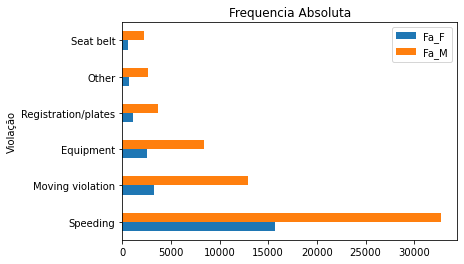

In [20]:
plt.show(gen.plot.barh('Violação', title = 'Frequencia Absoluta'))

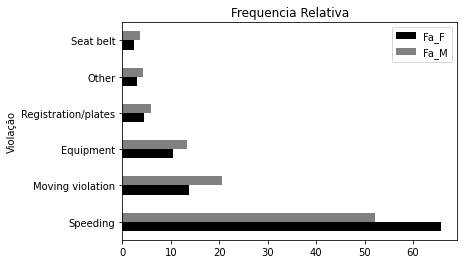

In [21]:
plt.show(gen_r.plot.barh('Violação', title = 'Frequencia Relativa', color=['black','gray']))

#####  Quando um motorista é parado por excesso de velocidade, muitas pessoas acreditam que o gênero influencia se o motorista receberá uma multa ou um aviso. 
- Para tentar responder essa pergunta, crie uma tabela de contingência considerando as variáveis driver_gender e stop_outcome e então vai comparar a porcentagem de paradas resultados de uma "Citation" versus um "Warning"

In [22]:
filtragem = police['driver_gender'] == 'M'
f = police[filtragem]
df_m = pd.DataFrame(((f['stop_outcome'].value_counts(normalize=True))*100).round(decimals=2)).head(2)

In [23]:
filtragem = police['driver_gender'] == 'F'
f = police[filtragem]
df_f = pd.DataFrame(((f['stop_outcome'].value_counts(normalize=True))*100).round(decimals=2)).head(2)
df_f.columns = ['Freq. F']
df_f['Freq. M'] = df_m['stop_outcome']
df_f

,Freq. F,Freq. M
Citation,89.39,88.97
Warning,6.25,5.82


##### O gênero afeta a escolha de veículos a serem revistados?
- Primeiro, calcule a porcentagem de todas as paradas no DataFrame que resultam em uma revista de veículo

In [24]:
((police['search_conducted'].value_counts()/police['search_conducted'].value_counts().sum())*100).round(decimals=2)

False    96.18
True      3.82
Name: search_conducted, dtype: float64

In [25]:
rev = pd.DataFrame(police.groupby('driver_gender')['search_conducted'].value_counts())
rev['search_conducted'] = ((rev['search_conducted']/rev['search_conducted'].sum())*100).round(decimals=2)
rev

search_conducted
driver_gender search_conducted                  
F             False                        26.95
              True                          0.53
M             False                        69.23
              True                          3.29

In [26]:
mask = police['search_conducted'] == True
rev_tipo = pd.DataFrame(police[mask].groupby('driver_gender')['search_type'].value_counts())
rev_tipo['search_type'] = ((rev_tipo['search_type']/rev_tipo['search_type'].sum())*100).round(decimals=2)
rev_tipo.columns = ['Porcentagem']
rev_tipo

Porcentagem
driver_gender search_type                                                    
F             Incident to Arrest                                         5.93
              Probable Cause                                             3.39
              Inventory                                                  1.39
              Incident to Arrest,Inventory                               0.67
              Protective Frisk                                           0.54
              Incident to Arrest,Probable Cause                          0.39
              Reasonable Suspicion                                       0.36
              Probable Cause,Reasonable Suspicion                        0.30
              Incident to Arrest,Protective Frisk                        0.24
              Incident to Arrest,Inventory,Probable Cause                0.18
              Inventory,Probable Cause                                   0.12
              Incident to Arrest,Probable Cause,Protective Frisk         0.06
              Protective Frisk,Reasonable Suspicion                      0.06
              Incident to Arrest,Inventory,Protective Frisk              0.03
              Incident to Arrest,Reasonable Suspicion                    0.03
              Inventory,Protective Frisk,Reasonable Suspicion            0.03
              Probable Cause,Protective Frisk                            0.03
              Probable Cause,Protective Frisk,Reasonable Susp...         0.03
M             Incident to Arrest                                        33.08
              Probable Cause                                            24.55
              Reasonable Suspicion                                       6.11
              Inventory                                                  5.23
              Protective Frisk                                           4.41
              Incident to Arrest,Inventory                               3.05
              Incident to Arrest,Probable Cause                          2.63
              Probable Cause,Reasonable Suspicion                        1.33
              Probable Cause,Protective Frisk                            1.03
              Incident to Arrest,Inventory,Probable Cause                0.88
              Incident to Arrest,Protective Frisk                        0.76
              Inventory,Probable Cause                                   0.64
              Incident to Arrest,Inventory,Protective Frisk              0.51
              Protective Frisk,Reasonable Suspicion                      0.51
              Inventory,Protective Frisk                                 0.36
              Incident to Arrest,Probable Cause,Protective Frisk         0.33
              Incident to Arrest,Reasonable Suspicion                    0.21
              Incident to Arrest,Probable Cause,Reasonable Su...         0.15
              Incident to Arrest,Inventory,Reasonable Suspicion          0.12
              Probable Cause,Protective Frisk,Reasonable Susp...         0.12
              Incident to Arrest,Protective Frisk,Reasonable ...         0.06
              Inventory,Reasonable Suspicion                             0.06
              Inventory,Probable Cause,Protective Frisk                  0.03
              Inventory,Probable Cause,Reasonable Suspicion              0.03

<div class =  "alert alert-block alert-success">
<h2>Tarefa 3
<div>

##### A taxa de prisão varia de acordo com a hora do dia?
- Primeiro, você calculará a taxa de prisão em todas as paradas no DataFrame, calculando a média da coluna is_arrested

In [27]:
pd.DataFrame(police['is_arrested'].value_counts())

,is_arrested
False,83458
True,3078


- Em seguida, você calculará a taxa de prisão por hora usando o atributo de hora do índice. No final crie uma nova variável hourly_arrest_rate com os valores encontrados da taxa de prisão por hora;

In [28]:
police.reset_index(inplace=True)
police['hora'] = police['stop_datetime'].dt.hour
mask = police['is_arrested'] == True
hourly_arrest_rate = pd.DataFrame(police[mask].groupby('is_arrested')['hora'].value_counts(normalize=True)*100).round(decimals=2
                                                                                                                     )
hourly_arrest_rate.columns = ['Taxa de prisão']
hourly_arrest_rate = hourly_arrest_rate.reset_index().drop(columns=['is_arrested']).set_index('hora')
hourly_arrest_rate.sort_values(by='hora')

,Taxa de prisão
hora,
0,8.06
1,8.51
2,5.30
3,2.08
4,0.39
5,0.26
6,1.40
7,1.85
8,3.51


##### Gráfico de linha mostrando a variável hourly_arrest_rate

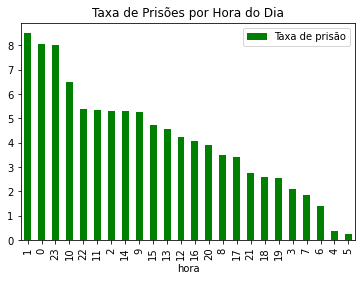

In [29]:
plt.show(hourly_arrest_rate.plot.bar(y='Taxa de prisão', title = 'Taxa de Prisões por Hora do Dia', color=['green']))

##### Em uma pequena parte das paradas de trânsito, drogas são encontradas no veículo durante uma busca. Essas interrupções relacionadas à drogas estão se tornando mais comuns com o tempo?
- A coluna booleana drug_related_stop indica se drogas foram encontradas durante uma determinada parada. Você calculará a taxa anual de drogas reamostrando essa coluna

In [30]:
police['ano'] = police['stop_datetime'].dt.year
mask = police['drugs_related_stop'] == True
taxa_droga_ano = pd.DataFrame(police[mask].groupby('drugs_related_stop')['ano'].value_counts(normalize=True)*100).round(
                                                                                                            decimals=2)
taxa_droga_ano.columns = ['Taxa anual de drogas']
taxa_droga_ano = taxa_droga_ano.reset_index().drop(columns=['drugs_related_stop']).set_index('ano')
taxa_droga_ano.sort_values(by='ano')

,Taxa anual de drogas
ano,
2005,1.86
2006,8.47
2007,8.35
2008,7.19
2009,8.24
2010,8.35
2011,8.70
2012,11.95
2013,11.48


##### Gráfico de linha para visualizar como a taxa mudou ao longo do tempo;

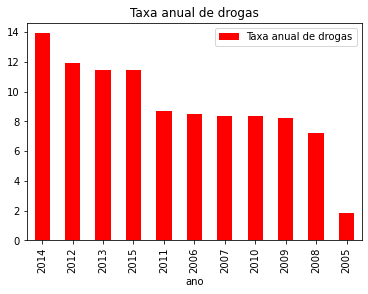

In [31]:
plt.show(taxa_droga_ano.plot.bar(title = 'Taxa anual de drogas', color=['red']))

#####  Consideremos a hipótese de que, o aumento ou a diminuição das apreensões de drogas estão associadas ao aumento ou diminuição das abordagens políciais, ou seja, mais abordagens, geram mais apreensões e menos abordagens, menos apreensões de drogas.
- Para isso, calcule a taxa de pesquisa anual reamostrando a coluna search_conducted e salve o resultado como Annual_search_rate. Concatene Annual_drug_rate e Annual_search_rate ao longo do eixo das colunas

In [32]:
taxa_ano = pd.DataFrame(police['ano'].value_counts(normalize=True)*100).round(decimals=2)
taxa_ano.columns = ['Taxa anual']
taxa_ano = taxa_ano.sort_index(ascending=True)
taxa_ano['Taxa anual de drogas'] = taxa_droga_ano['Taxa anual de drogas']

- Gráficos de linha para os resultados da concatenação

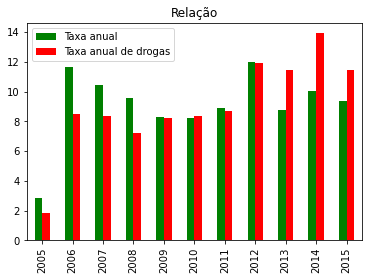

In [33]:
plt.show(taxa_ano.plot.bar(title = 'Relação', color=['green', 'red']))

##### O estado de Rhode Island está dividido em seis distritos policiais, também conhecidos como zonas. Como as zonas se comparam em termos de quais infrações são detectadas pela polícia?
- Para isso, crie uma distribuição conjunta entre as variáveis district e violation, usando uma tabela de contingência. Depois, selecione as linhas das zonas ’Zona K1’ a ’Zona K3’

In [34]:
zonas = pd.DataFrame(police.groupby('district')['violation'].value_counts(normalize=True)*100).round(decimals=2)
zonas.columns = ['Taxa de infrações']
zonas = zonas.reset_index()
zonak1 = zonas[zonas['district'] == 'Zone K1']
zonak3 = zonas[zonas['district'] == 'Zone K3']
zonak13 = pd.concat([zonak1, zonak3])
zonak13.set_index(['district', 'violation'])

Taxa de infrações
district violation                             
Zone K1  Speeding                         71.84
         Moving violation                 15.12
         Equipment                         8.10
         Other                             3.50
         Registration/plates               1.45
Zone K3  Speeding                         63.00
         Moving violation                 14.82
         Equipment                        11.77
         Other                             3.60
         Registration/plates               3.55
         Seat belt                         3.26

##### Gráfico de barras agrupadas para ilustrar os resultados obtidos na tabela

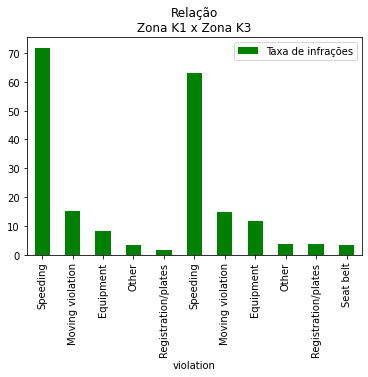

In [35]:
plt.show(zonak13.plot.bar('violation', title = (f'Relação\nZona K1 x Zona K3'), color=['green']))

Como as zonas se comparam em termos de quais infrações são detectadas pela polícia?
- R: Em relação as infrações mais ocorrentes, Velocidade e Violações em movimento, a taxa da Zona K1 é maior. Ja sobre as outras ocorrências, as taxas da Zona K3 são maiores, além de acrescentar outra infração que não há na Zona K1, Cinto de Segurança.

<div class =  "alert alert-block alert-success">
<h2>Tarefa 4
<div>

##### Explorando as temperaturas apresentadas no conjunto de dados
- Carregue o conjunto, selecione as variáveis relativas à temperatura, imprima as principais medidas resumo usando o comando describe e plote os três boxplots dessas variáveis em um mesmo gráfico.

In [36]:
tavg = weather[['TMIN', 'TAVG', 'TMAX']]
(tavg.describe()).round(decimals=2)

,TMIN,TAVG,TMAX
count,4017.00,1217.00,4017.00
mean,43.48,52.49,61.27
std,17.02,17.83,18.20
min,-5.00,6.00,15.00
25%,30.00,39.00,47.00
50%,44.00,54.00,62.00
75%,58.00,68.00,77.00
max,77.00,86.00,102.00


<AxesSubplot:>

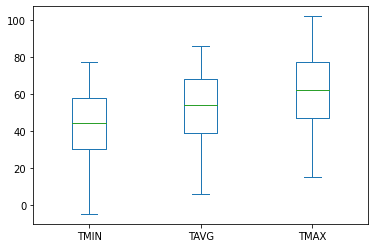

In [37]:
tavg.plot.box()

- O que você poderia comentar sobre as temperaturas, com base nos resultados obtidos?
 - R: A temperatura mais baixa registrada foi de 4,48F, o que em Celsius siginifica 6,3°C, ou seja, uma temperatura muito fria, quase anormal ao comparar com a realidade brasieira.

##### Criação da variável TDIFF, que representa a diferença entre as temperaturas
- apresente as medidas resumo e plote um histograma para essa variável.

In [38]:
weather['TDIFF']=weather['TMAX']-weather['TMIN']
pd.DataFrame((weather['TDIFF'].describe()).round(decimals=2))

,TDIFF
count,4017.00
mean,17.78
std,6.35
min,2.00
25%,14.00
50%,18.00
75%,22.00
max,43.00


<AxesSubplot:>

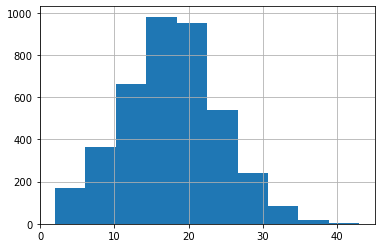

In [39]:
weather['TDIFF'].hist()

- O que pode dizer sobre a distribuição de dados?
    - R: Os resultados das diferenças das temperaturas estão muito concetrados entre 10 e 20, segundo o histograma

###### Preparação dos DataFrames para serem mesclados.
- No DataFrame sobre abordagens no trânsito, você transformará o índice stop_datetime para uma coluna (reset_index), pois o índice será perdido durante a mesclagem

In [40]:
police.head()

,stop_datetime,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,hora,ano
0,2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,12,2005
1,2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,23,2005
2,2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,4,2005
3,2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,17,2005
4,2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,1,2005


- Colocar DATE em um novo DataFrame (a coluna rating não existe)

In [41]:
DATE = pd.DataFrame(weather['DATE'])
DATE

,DATE
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
4012,2015-12-27
4013,2015-12-28
4014,2015-12-29
4015,2015-12-30


###### Mesclagem dos DataFrames.
- Assim que a mesclagem for concluída, defina stop_datetime novamente como o índice

In [42]:
police_weather = pd.merge(police, weather, left_index=True, right_index=True).set_index('stop_datetime')
police_weather

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,9
2005-02-20 17:15:00,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,...,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,...,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-02-22 10:06:00,F,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2006-02-22 10:10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2006-02-22 10:10:00,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


###### Levante duas questões e as responda usando qualquer técnica que ache necessária.

### Quais as porcentagens de paradas em relação a etnia?

In [43]:
etnia = pd.DataFrame(police_weather['driver_race'].value_counts(normalize=True)).round(decimals=2)
etnia

,driver_race
White,0.84
Black,0.11
Asian,0.03
Hispanic,0.02
Other,0.00


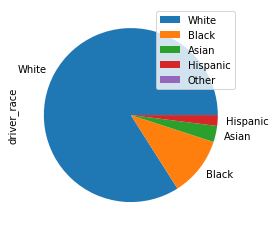

In [49]:
plt.show(etnia.plot.pie(y = 'driver_race'))

### Quais as porcentagens das violações cometidas por pessoas Pretas?

In [45]:
mask = police_weather['driver_race'] == 'Black'
pp = pd.DataFrame(police_weather[mask]['violation'].value_counts()).round(decimals=2)
pp

,violation
Speeding,238
Moving violation,85
Equipment,55
Registration/plates,48
Other,13


<AxesSubplot:ylabel='violation'>

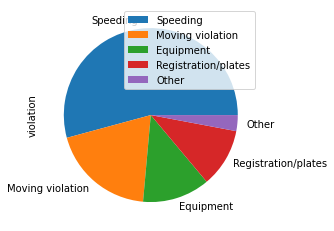

In [46]:
pp.plot.pie(y = 'violation')